<a href="https://colab.research.google.com/github/mirnanoukari/Theoretical-Mechanics/blob/main/Week%201%20HW/TM_HW1_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 1** 

The system $$ {x = 3 t }$$ $${ y = 4 t^2 + 1}$$

isolating $t$ from the first equation yields: ${ t = x/3}$
 
thus,  ${y = 4 x^2 / 9+ 1}$


${x' = V_x = 3}$   &#8594;  ${x'' = a_x = 0}$

${y' = V_y = 8t}$  &#8594;  ${y'' = a_y = 8}$

$$\overrightarrow{V}= \overrightarrow{V_x} + \overrightarrow{V_y} = \begin{bmatrix} 3 \\
8t \\
\end{bmatrix}$$


$$\overrightarrow{|V|} = \sqrt{ {V_x ^2} + {V_y ^2}} = \sqrt{9+ 64 t^2 }
$$

$$\overrightarrow{a} =  \overrightarrow{a_x} + \overrightarrow{a_y} = \begin{bmatrix} 0 \\
8 \\
\end{bmatrix}$$

$$\overrightarrow{|a|} = 8 $$

All the calculations in this code are made using these formulas over ${t \in [-5, 5]}$

${a_T = \frac{a .V}{|V|}}
=  \frac{8  (3 i + 8 t j)}{\sqrt{9+ 64 t^2 }}
$ 

${a_n = \frac{|a*V|}{V}} 
= \sqrt{a^2 - a_T ^2}
$

$
{ \rho = \frac{V^2}{a_n}}
$

$ {k = \frac{1}{\rho}}
$



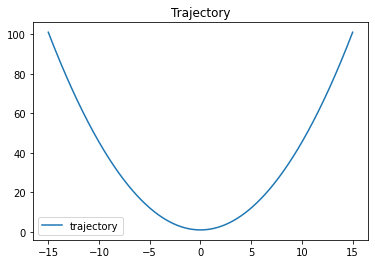

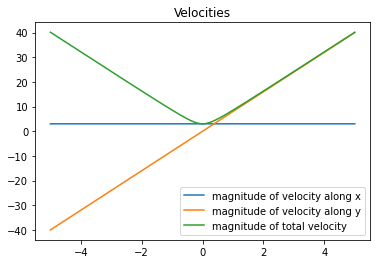

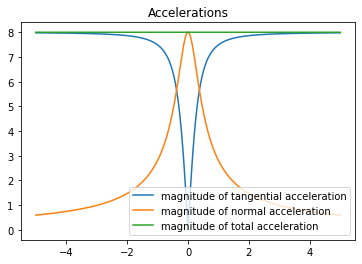

In [4]:
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt

N = 8192
t = np.linspace(-5, 5, N)
dt = t[1] - t[0]

x = 3 * t
y = 4 * t ** 2 + 1

plt.plot(x, y, label = 'trajectory')
plt.legend()
plt.title('Trajectory')
plt.show()

vx = np.diff(x) / dt
vy = np.diff(y) / dt

v = np.array([vx, vy]).transpose()
plt.plot(t[:-1], vx, label = 'magnitude of velocity along x')
plt.plot(t[:-1], vy, label = 'magnitude of velocity along y')
plt.plot(t[:-1], lg.norm(v, axis = 1), label = 'magnitude of total velocity')
plt.title('Velocities')
plt.legend()
plt.show()

a = np.diff(v, axis = 0) / dt
at = np.zeros(a.shape)
an = np.zeros(a.shape)
k = np.zeros(N - 2)

for i in range(N - 2):
  at[i] = v[i] * np.dot(a[i], v[i]) / np.dot(v[i], v[i])
  an[i] = a[i] - at[i]
  k[i] = np.sqrt(np.dot(an[i], an[i])) / np.dot(v[i], v[i])

plt.plot(t[:-2], lg.norm(at, axis = 1), label = 'magnitude of tangential acceleration')
plt.plot(t[:-2], lg.norm(an, axis = 1), label = 'magnitude of normal acceleration')
plt.plot(t[:-2], lg.norm(a, axis = 1), label = 'magnitude of total acceleration')
plt.legend(loc = 'lower right')
plt.title('Accelerations')
plt.show()